<a href="https://colab.research.google.com/github/sreehari7212/mini_project/blob/main/mini_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a dataset from a bank. This bank besides usual service also provides car insurance service. The bank has potential customers data and bank employees call them for advertising available car insurance options. We are provided with general information about clients (age, job, bank balance, education, etc.) as well as more specific information about the current insurance sell campaign (communication, last contact day) and previous campaign (attributes like previous attempts, etc). We have data about 4000 customers who were contacted during the last campaign and for whom the results of campaign (dis the customer buy insurance or not) are known.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
df=pd.read_csv('/content/drive/MyDrive/carInsurance_train.csv',na_values={'jobs':['NA'],'Communication':['NA'],'Education':['NA'],'Outcome':['NA']})
#test=pd.read_csv('carinsurance_test.csv',na_values={'jobs':['NA'],'Communication':['NA'],'Education':['NA'],'Outcome':['NA']})
df.value_counts()

Id    Age  Job            Marital  Education  Default  Balance  HHInsurance  CarLoan  Communication  LastContactDay  LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  Outcome  CallStart  CallEnd   CarInsurance
3     29   management     single   tertiary   0         637     1            0        cellular       3               jun               1             119         1             failure  16:30:24   16:36:04  1               1
2702  33   self-employed  single   tertiary   0         562     1            1        cellular       6               apr               1             363         1             failure  16:23:53   16:27:09  1               1
2564  35   management     married  secondary  0         724     1            0        cellular       14              jul               2             415         1             failure  15:07:33   15:12:20  1               1
2574  46   blue-collar    married  secondary  0         1568    1            0        cellular       2           

In [ ]:
a=df.isnull().sum()
a

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [ ]:
b=df.dtypes
b


Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [ ]:
c=df.columns
c


Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [ ]:
d=df.describe()
d

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [ ]:
df.ffill(inplace=True)
df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,telephone,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,failure,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,failure,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,failure,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,failure,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0


VISUALISATION

1)plot a pie diagram depicting people who took car insurance and those did not take car insurance from car company.

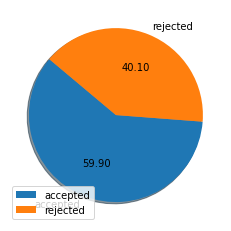

In [ ]:
target=df.iloc[:,-1].value_counts()
plt.pie(target,labels=["accepted","rejected"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("carinsurance")
plt.legend(loc = "lower left")
plt.show()

2)show the relationship between age of the client and target (carinsurance),using a histogram

In [ ]:
px.histogram(df,x='Age',facet_row='CarInsurance',)

3)show the relation bitween balance of client and CarInsurance.

In [ ]:
px.histogram(df,x='Balance',color = 'CarInsurance',range_x=[0,10000])

4)show the job features of the clients through a bar graph

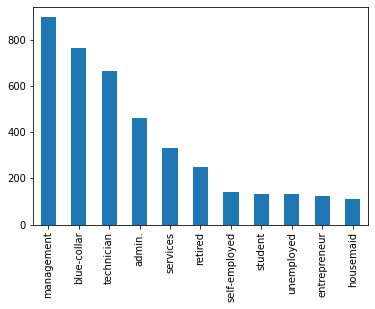

In [ ]:
df['Job'].value_counts().plot.bar()

5)show the relationship between the job of the client and the target (CarInsurance)



In [ ]:
fig=px.histogram(df, x="Job",facet_row='CarInsurance')
marker_color='#330C73',
fig.show()

6)show the education qualification of the client using a bar graph

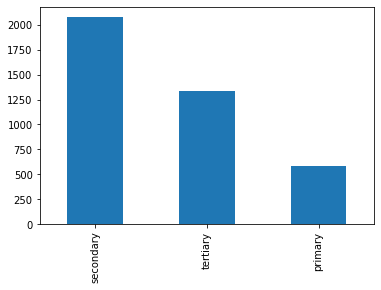

In [ ]:
df['Education'].value_counts().plot.bar()

7)show the relationship between the education of the client and target (CarInsurance), using a histogram.

In [ ]:
px.histogram(df, x="Education",facet_row='CarInsurance')

8)show the relation between last contact month and carinsurance

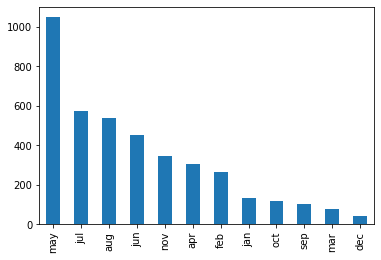

In [ ]:
df['LastContactMonth'].value_counts().plot.bar()

9)show that which month has the highest market in carinsurance,using histogram.

In [ ]:
px.histogram(df, x="LastContactMonth",facet_row='CarInsurance')

10)show the marital status of the clients using a bar graph

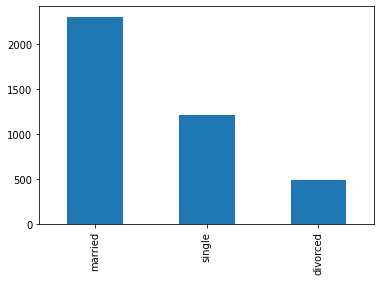

In [ ]:
df['Marital'].value_counts().plot.bar()

11)show the relationship between marital status and carinsurance,using histogram.

In [ ]:
px.histogram(df, x="Marital",facet_row='CarInsurance')

12)show the relation between dayspassed anmd carinsurance.



In [ ]:
px.histogram(df,x='DaysPassed',facet_row='CarInsurance')

13)show the relation between the column (communication) and carinsurance.

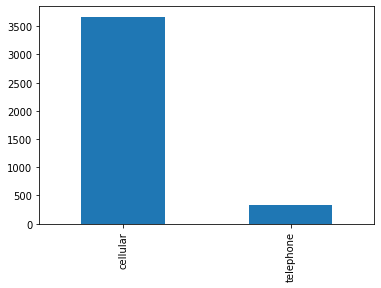

In [ ]:
df['Communication'].value_counts().plot.bar()

**visualisation analysis**


*   *Most of the client rejected the carinsurance *
*   *Most customers work in the management sector,married and have secondary education.*

*   *the clients with least bank balance takes the carinsurance compare to others*

*   *More than a quarter of customers were contacted in May.*
*   *For the Contact communication type,clients usually use cellular contact communication.*


*   *Clients with higher education (tertiary) are more likely to buy car insurance.

*






---




In [ ]:
df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,telephone,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,failure,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,failure,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,failure,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,failure,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0


In [ ]:
label=LabelEncoder()
marital=label.fit_transform(df['Marital'])
job=label.fit_transform(df['Job'])
education=label.fit_transform(df['Education'])
communication=label.fit_transform(df['Communication'])
lastcontactmonth=label.fit_transform(df['LastContactMonth'])
df['Marital']=marital
df['Job']=job
df['Education']=education
df['Communication']=communication
df['LastContactMonth']=lastcontactmonth

In [ ]:
df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,4,2,2,0,1218,1,0,1,28,4,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,1,1,0,0,1156,1,0,1,26,8,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,4,2,2,0,637,1,0,0,3,6,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,8,2,0,0,373,1,0,0,11,8,2,-1,0,failure,12:06:43,12:20:22,1
4,5,30,4,1,2,0,2694,0,0,0,3,6,1,-1,0,failure,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,9,2,2,0,0,1,0,0,25,8,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,0,0,1,0,124,1,1,0,29,5,19,-1,0,failure,14:49:16,14:51:21,0
3997,3998,27,0,2,1,0,-400,0,1,0,8,5,1,-1,0,failure,12:19:03,12:23:53,0
3998,3999,36,2,2,2,0,658,1,0,0,29,4,1,227,3,failure,11:27:35,11:29:14,0


**Usercase**


1.   Job
    0-admin
    1-bluecollar
    2-enterprenour
    3-housemaid
    4-managemnet
    5-technician job
    6-self-emloyed
    7-services
    8-student

2.   marital
    0-divorced
    1-married
    3-single

3.  Education
    0-primary
    1-tertiary
    2-secondary
4. communication    
    0-cellular
    1-telephone
5. lastcontactmonth
    0-April
    1-August
    2-December
    3-February
    5-January
    6-July
    7-June
    8-March
    9-May
    10-November
    11-October
    12-September



In [ ]:
df.drop(['Id','Outcome','CallStart','CallEnd','Communication'],axis=1,inplace=True)
x=df.iloc[:,0:13].values
y=df.iloc[:,-1].values

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=0)

In [ ]:
df

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,32,4,2,2,0,1218,1,0,28,4,2,-1,0,0
1,32,1,1,0,0,1156,1,0,26,8,5,-1,0,0
2,29,4,2,2,0,637,1,0,3,6,1,119,1,1
3,25,8,2,0,0,373,1,0,11,8,2,-1,0,1
4,30,4,1,2,0,2694,0,0,3,6,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28,9,2,2,0,0,1,0,25,8,1,40,2,1
3996,49,0,0,1,0,124,1,1,29,5,19,-1,0,0
3997,27,0,2,1,0,-400,0,1,8,5,1,-1,0,0
3998,36,2,2,2,0,658,1,0,29,4,1,227,3,0


CORRALATION

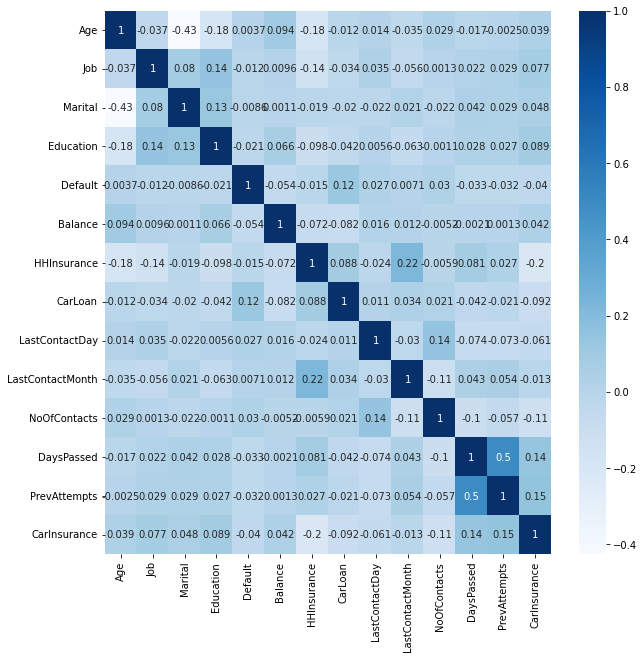

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues")

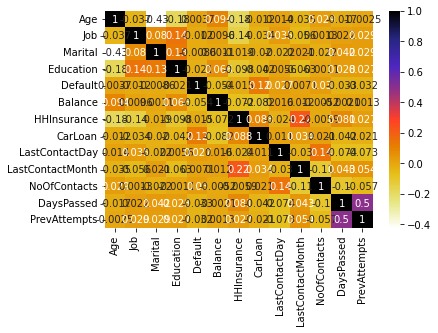

In [ ]:
a = df.iloc[:,:13]
corelate = a.corr()
sns.heatmap(corelate, annot = True, cmap = plt.cm.CMRmap_r)

RandomForestClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
cm=confusion_matrix(ytest, y_pred)
acc=accuracy_score(ytest, y_pred)
report=classification_report(ytest, y_pred)

In [ ]:
y_pred

In [ ]:
cm

array([[512,  81],
       [201, 206]])

In [ ]:
acc

0.718

In [ ]:
report

'              precision    recall  f1-score   support\n\n           0       0.72      0.86      0.78       593\n           1       0.72      0.51      0.59       407\n\n    accuracy                           0.72      1000\n   macro avg       0.72      0.68      0.69      1000\nweighted avg       0.72      0.72      0.71      1000\n'

In [ ]:
#model.predict(Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,)
model.predict([[28,3,1,1,0,1222,1,1,1,1,2,2,2]])

array([1])

In [ ]:
#Save the model using pickle
f = open(file = 'SREEHARI-MiniProject_final.pkl', mode = 'bw')
pickle.dump(model, f)
f.close()